In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler

There are three main slicers that we use in MAF.  For all three, we'll use the same metric and sql query to see how they differ.

In [2]:
# Set the database and query
dbAddress = 'sqlite:///enigma_1189_sqlite.db'
sqlWhere = 'filter = "r" and night < 400'
opsdb = db.OpsimDatabase('sqlite:///enigma_1189_sqlite.db')
outDir = 'Slicers'
resultsDb = db.ResultsDb(outDir=outDir)

# For the count metric the col kwarg is pretty much irrelevant, so we'll just use expMJD, but any column in the database would work
metric = metrics.CountMetric(col='expMJD', metricName='Count')


First the UniSlicer--this slicer simply passes all the data directly to the metric. So in this case, we will get the total number of visits.

In [3]:
slicer = slicers.UniSlicer()

In [4]:
bundles = {}
bundles['uni'] = metricBundles.MetricBundle(metric,slicer,sqlWhere)

Next, the oneDSlicer. Here, we say we want to bin based on the 'night' column, and use binsize of 10 (days).  

In [5]:
slicer = slicers.OneDSlicer(sliceColName='night', binsize=10)
bundles['oneD'] = metricBundles.MetricBundle(metric,slicer,sqlWhere)

Finally, the healpixSlicer will calculate the metric at a serries of points accross the sky, using only the pointings that overlap the given point.

In [6]:
slicer = slicers.HealpixSlicer(nside=64)
bundles['healpix'] = metricBundles.MetricBundle(metric,slicer,sqlWhere)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [7]:
bgroup = metricBundles.MetricBundleGroup(bundles,opsdb, outDir=outDir, resultsDb=resultsDb)

Now we can run all three and see the output

In [8]:
bgroup.runAll()

Querying database with constraint filter = "r" and night < 400
Found 46128 visits
Running:  ['uni']
Completed metric generation.
Running:  ['healpix']
Completed metric generation.
Running:  ['oneD']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression 'filter = "r" and night < ...' should be explicitly declared as text('filter = "r" and night < ...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


In [9]:
print bundles['uni'].metricValues
bundles['uni'].plot()

[46128.0]


{}

Note the metric value matches the output from when we executed bgroup.runAll().  Since the uniSlicer only computes a single value, the plot method returns nothing.

[-- 64.0 779.0 20.0 1384.0 713.0 20.0 1352.0 867.0 78.0 20.0 1875.0 857.0
 1406.0 533.0 1283.0 971.0 245.0 1533.0 2520.0 1918.0 2025.0 991.0 61.0
 1401.0 979.0 489.0 643.0 3071.0 811.0 440.0 1930.0 20.0 1032.0 3162.0
 680.0 1420.0 1678.0 2109.0 1459.0 3289.0 --]


{'BinnedData': 1}

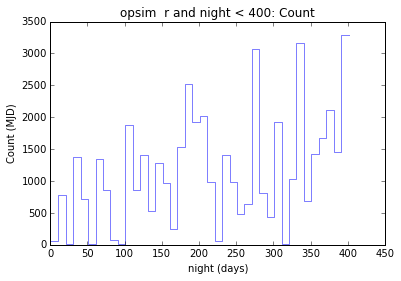

In [10]:
print bundles['oneD'].metricValues
bundles['oneD'].plot()

[-- -- -- ..., 30.0 30.0 60.0]
monopole: 14.2282  dipole: lon: 57.0805, lat: -76.726, amp: 7.76403


Optimal bin calculation tried to make 586 bins, returning 200


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

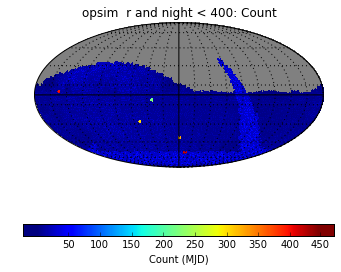

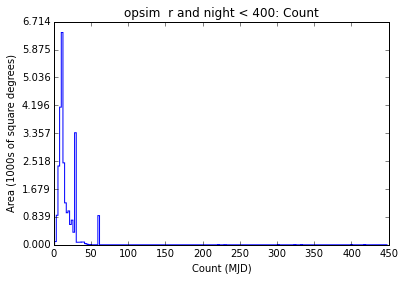

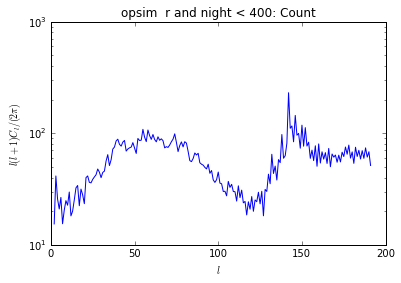

In [11]:
print bundles['healpix'].metricValues
bundles['healpix'].plot()

monopole: 14.2282  dipole: lon: 57.0805, lat: -76.726, amp: 7.76403


Optimal bin calculation tried to make 586 bins, returning 200


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

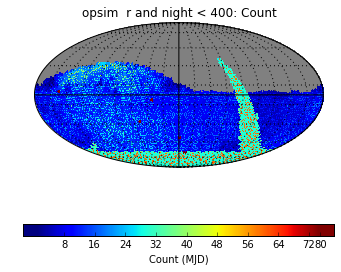

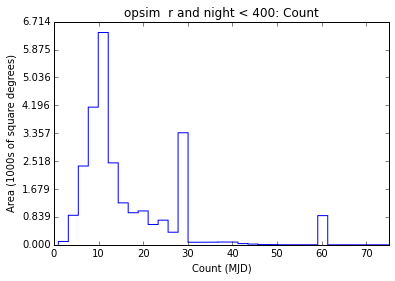

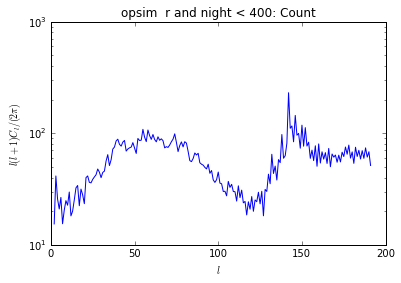

In [12]:
# The deep drilling fields skew the scale, let's adjust it a bit and re-plot
bundles['healpix'].setPlotDict({'colorMax':75, 'xMax':75})
bundles['healpix'].plot()
